In [3]:
require "zlib"
def show(image)
 def chunk(type, data)
   [data.bytesize, type, data, Zlib.crc32(type + data)].pack("NA4A*N")
 end
 def make_png(raw_data)
   height = raw_data.size
   width = raw_data[0].size
   s = "\x89PNG\r\n\x1a\n".force_encoding("ascii-8bit")
   s1 = chunk("IHDR", [width, height, 8, 2, 0, 0, 0].pack("NNCCCCC"))
   s2 = chunk("IDAT", Zlib::Deflate.deflate(raw_data.map {|line|
                        ([0] + line.flatten).pack("C*") }.join))
   s3 = chunk("IEND", "")
   s + s1 + s2 + s3
 end
 def to_8bit(c)
   if c.is_a?(Array)
     if c[0].is_a?(Numeric)
       c.map{|e| (e * 255).to_i }
     else
       raise "show(): bad array element " + c.to_s
     end
   else
     [(c * 255).to_i] * 3
   end
 end
 if !image.is_a?(Array)
   puts "show(): not an array" ; false
 else
   if !image[0].is_a?(Array)
     image = [image]
   end
   h = image.size
   s = h < 10 ? 20 : h < 60 ? 10 : h < 400 ? 400 / h : 1
   data = image.flat_map{|r| [r.flat_map{|c| [to_8bit(c)] * s }] * s}
   IRuby.display make_png(data), mime: "image/png" ; true
 end
end

:show

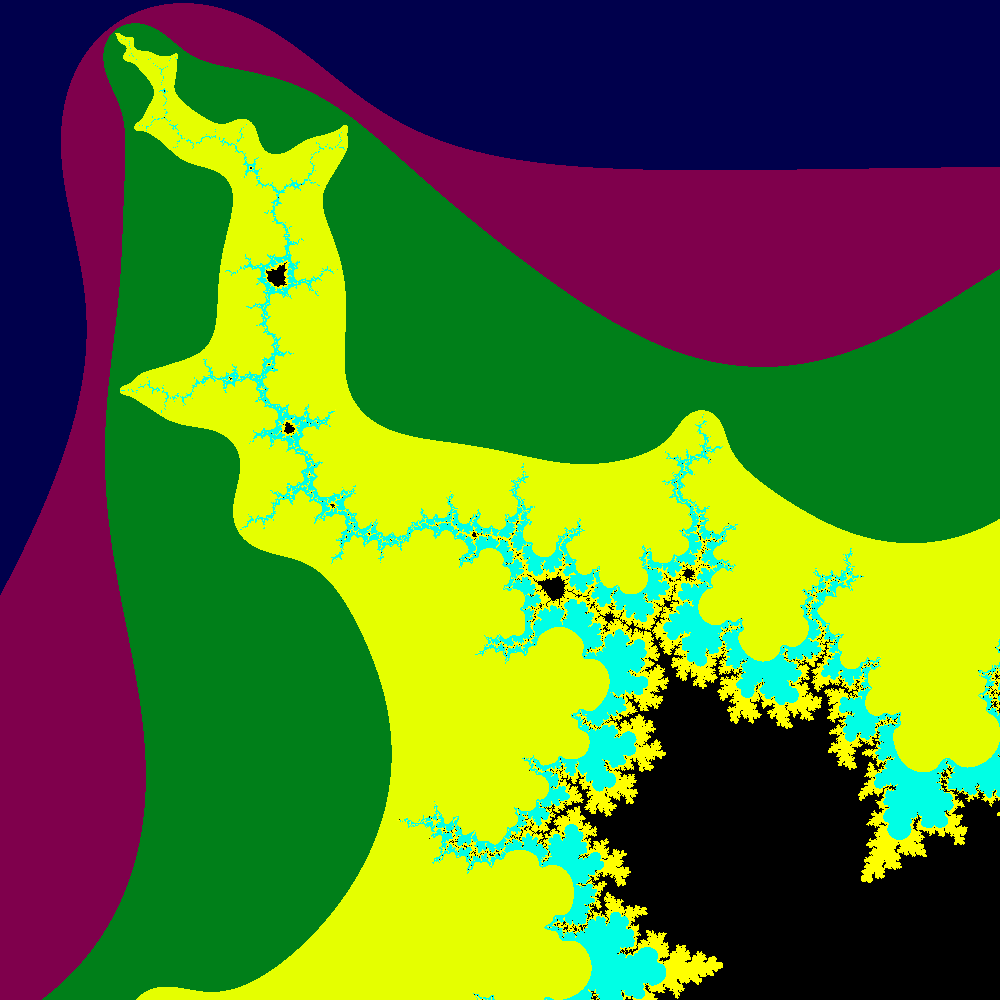

true

In [4]:
def make2d(height, width) 
  Array.new(height){ Array.new(width, 0) }
end
def Mandelbrot(s)
 image = make2d(s, s)
 for y in 0..(s-1)
  for x in 0..(s -1)
   image[y][x] = b((x - 5300) / 4000.0, (y - 1800) / 4000.0)
  end
 end
 image
end
def b(x, y)
  n = 0
  r = 0.0
  i = 0.0
  while r**2 + i**2 < 4 && n <= 50 do
   oldR = r
   oldI = i
   n = n+1
   r = oldR**2-oldI**2 + x
   i = 2*oldR*oldI + y
  end
  if n > 50
    0
  elsif n > 30
    [1,1,0]
  elsif n > 20
    [0,1,0.9]
  elsif n > 10
    [0.9,1,0]
  elsif n > 7
    [0,0.5,0.1]
  elsif n > 6
    [0.5,0,0.3]
  else
    [0,0,0.3]
  end 
end
show(Mandelbrot(1000))